

```

    Generate artificial classification data.


```



In [8]:
number_of_samples_per_class = 15
number_of_relevant_features = 30  # TODO assert complete number of features?

number_of_pseudo_class_features = 10
number_of_random_features = 200

In [9]:
import artificial_data_generator_tools
import numpy as np

In [10]:
number_of_features_correlated_cluster1 = 5
correlated_cluster_1 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=number_of_features_correlated_cluster1,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.6,
)

generation of correlation matrix ...
generation of covariant matrix ...


/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/statsmodels/stats/correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


min absolute correlation: 0.5285714285714286


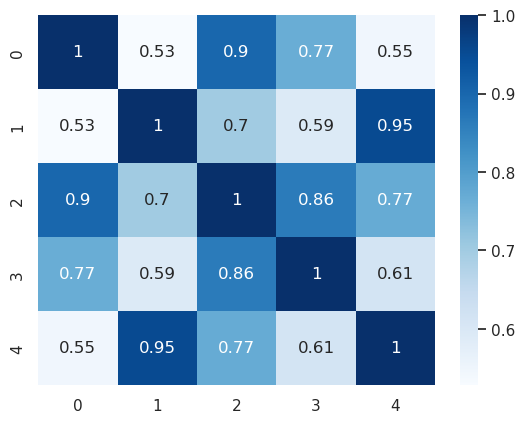

In [11]:
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_1)

In [12]:
number_of_features_correlated_cluster2 = 10
correlated_cluster_2 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=number_of_features_correlated_cluster2,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
)

generation of correlation matrix ...
generation of covariant matrix ...


/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/statsmodels/stats/correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


min absolute correlation: 0.8642857142857143


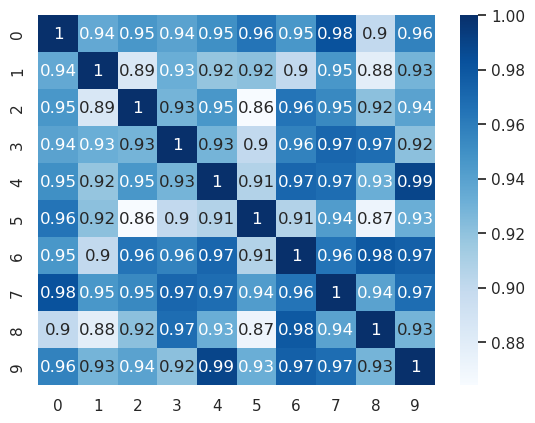

In [13]:
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_2)

Generate complete class 1

In [14]:
class_components_list = [correlated_cluster_1, correlated_cluster_2]

number_of_unclustered_relevant_features = number_of_relevant_features - (
    number_of_features_correlated_cluster1 + number_of_features_correlated_cluster2
)
if number_of_unclustered_relevant_features > 0:
    unclustered_relevant_features = (
        artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
            number_of_samples=number_of_samples_per_class,
            number_of_normal_distributed_relevant_features=number_of_unclustered_relevant_features,
            scale=1,
        )
    )
    class_components_list.append(unclustered_relevant_features)

ValueError: Number of relevant features must be greater than zero.

In [ ]:
class1_np = artificial_data_generator_tools.build_class(
    class_features_list=class_components_list,
)

In [ ]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_np)

In [ ]:
log_normal_distributed_class1_np = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_np=class1_np
    )
)
assert log_normal_distributed_class1_np.shape[1] == number_of_relevant_features

In [ ]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class1_np,
)

Generate class 2

In [ ]:
class2_np = artificial_data_generator_tools.generate_normal_distributed_class_features(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_relevant_features,
    scale=1,
)
label_class_2 = 1
class2_np = artificial_data_generator_tools.build_class(class_features_list=[class2_np])

In [ ]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_np, label_class_2)

In [ ]:
artificial_data_generator_tools.plot_distributions_of_all_classes([log_normal_distributed_class1_np, class2_np])

In [ ]:
shifted_class1_np = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class1_np, effect_size=2
)

In [ ]:
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class1_np, class2_np])

In [ ]:
artificial_data_generator_tools.plot_correlation_between_classes([shifted_class1_np, class2_np])

In [ ]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class1_np, class2_np],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
print(artificial_data_df.shape)
print(artificial_data_df.head())